## Task instructions

Here, we are asked to build a 4 qubit circuit formed by $L$ layers of even are odd blocks of parametrized gates, where the odd blocks are $R_x$ gates each with a parameter $\theta_{i,n} \in (0,2 \pi)$, where $i \in 1,2,3,4$ and $n \in$ odd; and the even block are formed by $R_z$ gates with different $\theta_{i,n}$ parameters with even $n$ followed by $c_z$ gates between each pair of qubits.
The resultant 4 qubit state $|\psi(\theta)>$ is used to calculate the minimum distance 
$$\epsilon = \text{min}_{\theta}|||\psi(\theta)>-|\phi(\theta)>||,$$
where $|\phi(\theta)>$ is a randomly generated 4 qubit vector. Therefore, we need to write a rutine that finds the optimal $\theta_{i,n}$ parameters that results in the minimum $\epsilon$ for each $L$.


In [1]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import numpy as np
from qiskit.quantum_info import random_statevector
from qiskit_textbook.tools import array_to_latex
import random
from qiskit.aqua.components.optimizers import COBYLA, AQGD
import matplotlib.pyplot as plt

### Solution

First, we create the random 4 qubit vector $|\phi(\theta)>$ that will be used as the reference vector, and the maximum number of layers $L_{max}$ for the circuit

In [2]:
Phi =np.fromiter(random_statevector(16).to_dict().values(), dtype = "complex_")   #phi random vector

L_max = 8   #maximum number of layers

And the rutine to get the optimal $\theta_{i,n}$ parameters for each circuit with the number of layers $L \in (1, L_{max})$ is presented here. We use the Constrained Optimization By Linear Approximation (COBYLA) method for the optimization.

In [3]:
Epsilon = [] 

for L in range(1, L_max+1):     #loop for each L case
    
    def qc_gates(theta):        #function to create the circuit
        theta_d = []
    
        for i_d in range (0,L):
            theta_r = [theta[8*i_d:8*i_d+4],theta[8*i_d+4:8*(i_d+1)]] 
            theta_d.append(theta_r)
    
        theta = np.asarray(theta_d)

        for i_l in range(0, L):
            for i in range (0, 4):
                circ.rx(theta[i_l][0][i], i)     #rx gates
        
            for i in range (0, 4):
                circ.rz(theta[i_l][0][i], i)     #rz gates
        
            circ.cz(0, 1)                        #cz gates
            circ.cz(0, 2)
            circ.cz(0, 3)
            circ.cz(1, 2)
            circ.cz(1, 3)
            circ.cz(2, 3)
            
    def cost(theta_c):              #function to calculate epsilon
        global circ 
    
        circ = QuantumCircuit(4)    #initialization of quantum circuit
    
        qc_gates(theta_c)           #evaluate gate function

        backend = Aer.get_backend('statevector_simulator')

        job = execute(circ, backend)

        result = job.result()

        st_vec = result.get_statevector()
    
        return np.linalg.norm(st_vec-Phi)
    
    theta_0 = np.random.rand(8*L)*2*np.pi   #initial random parameters theta
    
    bound = []
    
    for i_b in range(0, 8*L):
        bound.append([0, 2*np.pi])
        
    optimizer = COBYLA(maxiter=2000)       #optimization
    
    theta_opt, eps, _ = optimizer.optimize(len(theta_0), cost, initial_point=theta_0, variable_bounds=bound)
    
    Epsilon.append(eps)                   #store result


Finally, we plot the resultant minimum distance $\epsilon$ for each layer $L$

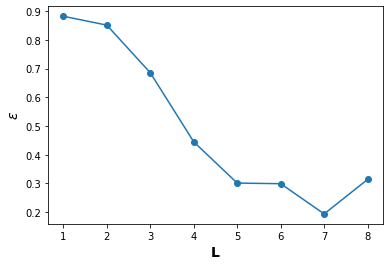

In [4]:
plt.plot(np.arange(1,L_max+1), Epsilon, marker='o')
plt.xlabel('L',fontsize=14, fontweight='bold')
plt.ylabel('$\epsilon$', fontsize=14, fontweight='bold')
plt.show()

As we can see, the minimum distance $\epsilon$ decreases as the number of layers $L$ in the circuit increases until it reaches a minmum value $\epsilon \approx 0.2$ for $L = 7$. Further increasing the number $L$ of layers produces an increase of the resultant parameter to $\epsilon \approx 0.3$

We may explore what happens when we use different parametrized gates in our circuit. For instance, if we change the $R_x$ gates in the odd blocks for $R_y$ gates, we get:

In [5]:
Epsilon = [] 

for L in range(1, L_max+1):     #loop for each L case
    
    def qc_gates(theta):        #function to create the circuit
        theta_d = []
    
        for i_d in range (0,L):
            theta_r = [theta[8*i_d:8*i_d+4],theta[8*i_d+4:8*(i_d+1)]] 
            theta_d.append(theta_r)
    
        theta = np.asarray(theta_d)

        for i_l in range(0, L):
            for i in range (0, 4):
                circ.ry(theta[i_l][0][i], i)     #ry gates
        
            for i in range (0, 4):
                circ.rz(theta[i_l][0][i], i)     #rz gates
        
            circ.cz(0, 1)                        #cz gates
            circ.cz(0, 2)
            circ.cz(0, 3)
            circ.cz(1, 2)
            circ.cz(1, 3)
            circ.cz(2, 3)
            
    def cost(theta_c):              #function to calculate epsilon
        global circ 
    
        circ = QuantumCircuit(4)    #initialization of quantum circuit
    
        qc_gates(theta_c)           #evaluate gate function

        backend = Aer.get_backend('statevector_simulator')

        job = execute(circ, backend)

        result = job.result()

        st_vec = result.get_statevector()
    
        return np.linalg.norm(st_vec-Phi)
    
    theta_0 = np.random.rand(8*L)*2*np.pi   #initial random parameters theta
    
    bound = []
    
    for i_b in range(0, 8*L):
        bound.append([0, 2*np.pi])
        
    optimizer = COBYLA(maxiter=2000)       #optimization
    
    theta_opt, eps, _ = optimizer.optimize(len(theta_0), cost, initial_point=theta_0, variable_bounds=bound)
    
    Epsilon.append(eps)                   #store result


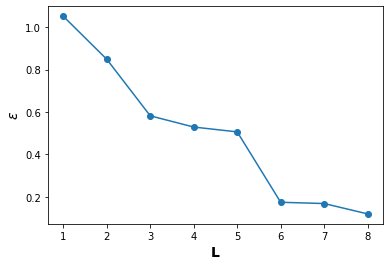

In [6]:
plt.plot(np.arange(1,L_max+1), Epsilon, marker='o')
plt.xlabel('L',fontsize=14, fontweight='bold')
plt.ylabel('$\epsilon$', fontsize=14, fontweight='bold')
plt.show()

We can note that the minimum $\epsilon$ in this case is lower than the optimal in the previous circuit, reaching a value of $\epsilon = 0.12$ for $L=8$. 

Now, replacing the $R_z$ gates in the even blocks for $R_y$ gates, we get:

In [8]:
Epsilon = [] 

for L in range(1, L_max+1):     #loop for each L case
    
    def qc_gates(theta):        #function to create the circuit
        theta_d = []
    
        for i_d in range (0,L):
            theta_r = [theta[8*i_d:8*i_d+4],theta[8*i_d+4:8*(i_d+1)]] 
            theta_d.append(theta_r)
    
        theta = np.asarray(theta_d)

        for i_l in range(0, L):
            for i in range (0, 4):
                circ.rx(theta[i_l][0][i], i)     #rx gates
        
            for i in range (0, 4):
                circ.ry(theta[i_l][0][i], i)     #ry gates
        
            circ.cz(0, 1)                        #cz gates
            circ.cz(0, 2)
            circ.cz(0, 3)
            circ.cz(1, 2)
            circ.cz(1, 3)
            circ.cz(2, 3)
            
    def cost(theta_c):              #function to calculate epsilon
        global circ 
    
        circ = QuantumCircuit(4)    #initialization of quantum circuit
    
        qc_gates(theta_c)           #evaluate gate function

        backend = Aer.get_backend('statevector_simulator')

        job = execute(circ, backend)

        result = job.result()

        st_vec = result.get_statevector()
    
        return np.linalg.norm(st_vec-Phi)
    
    theta_0 = np.random.rand(8*L)*2*np.pi   #initial random parameters theta
    
    bound = []
    
    for i_b in range(0, 8*L):
        bound.append([0, 2*np.pi])
        
    optimizer = COBYLA(maxiter=2000)       #optimization
    
    theta_opt, eps, _ = optimizer.optimize(len(theta_0), cost, initial_point=theta_0, variable_bounds=bound)
    
    Epsilon.append(eps)                   #store result


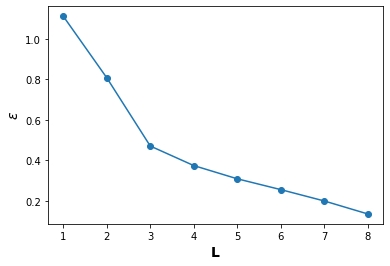

In [9]:
plt.plot(np.arange(1,L_max+1), Epsilon, marker='o')
plt.xlabel('L',fontsize=14, fontweight='bold')
plt.ylabel('$\epsilon$', fontsize=14, fontweight='bold')
plt.show()

In this case, we can see that $\epsilon$ quickly drops to a value of 0.47 for $L=3$, followed by a less steep linear decrease for $L \geq 4$ achiving a minimum of $\epsilon = 0.135$ for $L=8$